In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train = pd.read_csv('Titanicdata.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


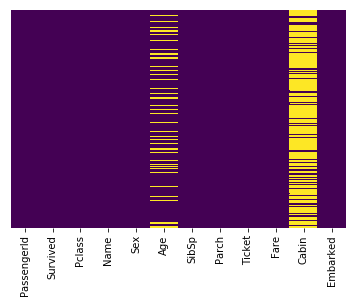

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

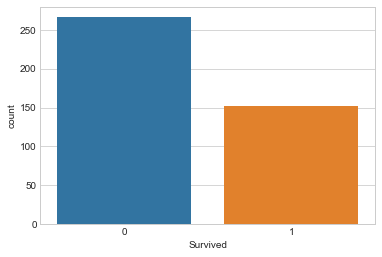

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

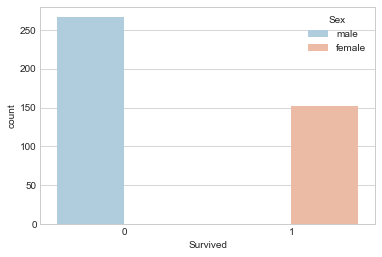

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

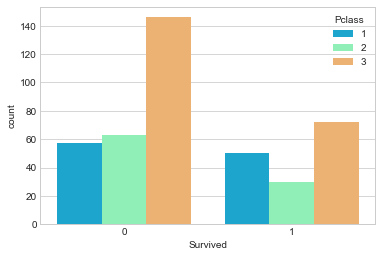

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

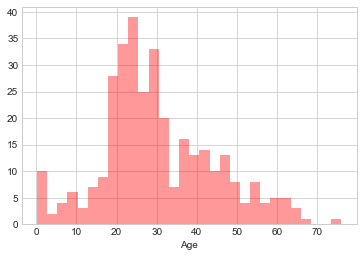

In [20]:
sns.distplot(train['Age'].dropna(),kde=False,color='red',bins=30)

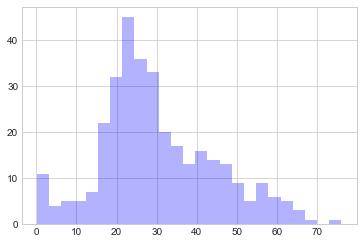

In [21]:
train['Age'].hist(bins=25,color='blue',alpha=0.3)

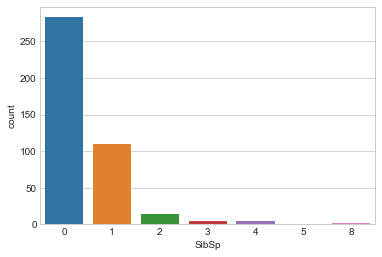

In [22]:
sns.countplot(x='SibSp',data=train)

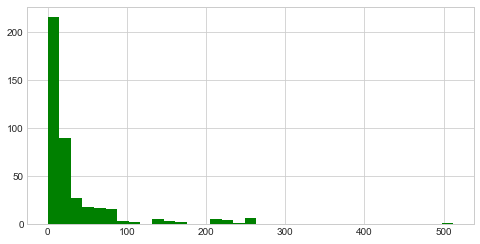

In [26]:
train['Fare'].hist(color='green', bins=35, figsize=(8, 4))

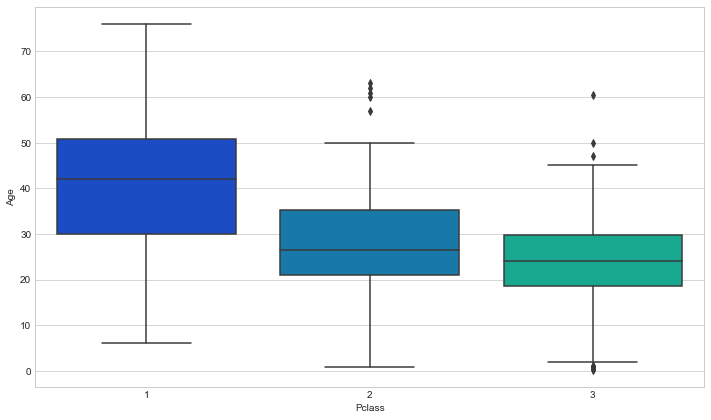

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [32]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

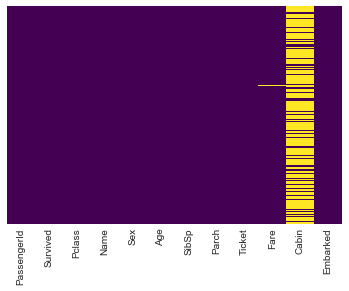

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
train.drop('Cabin',axis=1,inplace=True)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [36]:
train.dropna(inplace=True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    417 non-null int64
Survived       417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null object
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           417 non-null float64
Embarked       417 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [39]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [41]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [43]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis=1,inplace=True)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [47]:
train=pd.concat([train,sex,embark],axis=1)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [49]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [50]:
train['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix

In [60]:
accuracy=confusion_matrix(y_test,predictions)

In [61]:
accuracy

array([[65,  0],
       [ 0, 61]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

In [64]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)